# Structure from motion

In [3]:
from corres_search import *
from reconstruction import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# Load Images

img1 = cv.imread("data/fountain-P11/images/0004.jpg")
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.imread("data/fountain-P11/images/0006.jpg")
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

In [5]:
# Extract and save keypoints

kp1, desc1 = extract_features(img1)
kp2, desc2 = extract_features(img2)

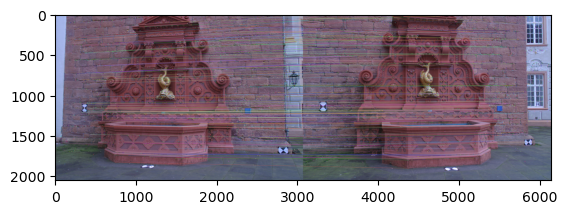

In [6]:
kp_matched = match_keypoints(desc1, desc2)

matched_img = draw_matches(img1, img2, kp1, kp2, kp_matched, num_matches=300)
plt.imshow(matched_img)
plt.show()

## DRAW KEYPOINTS

# img1_kps=cv.drawKeypoints(img1, kp1, img1, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# img2_kps=cv.drawKeypoints(img2, kp2, img2, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# fig,ax=plt.subplots(ncols=2,figsize=(18,8)) 
# ax[0].imshow(img1_kps)
# ax[0].title.set_text("fountain-0004")
# ax[1].imshow(img2_kps)
# ax[0].title.set_text("fountain-0006")
# plt.show()